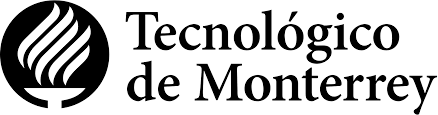

# <center>__Reto: Base de datos calidad de agua__</center>
## <center>__Parte 2: Clasificación y ensambles__</center>
### Ciencia y Analítica de datos
### Profesor Titular: María de la Paz Rico Fernández
### Maestría en Inteligencia Artificial Aplicada (MNA-V)

#### 18/11/2022

#### Equipo 24 
##### _Victor Hugo Avila Felipe - A01794425_
##### _Andrés Eduardo Figueroa García - A01378536_

## Instrucciones - Parte 1

En esta base de datos encontraras:
* Aguas subterraneas.
* Aguas superficiales.

Elige una base de datos, ya sea la de aguas superficiales o la de aguas subterraneas.

* Limpieza de base de datos.
 * Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):
 * Identificando tendencias centrales promedio, media y mediana de los datos. 
 * Identificar medidas de dispersión, máximo, mínimo .
 * Identificar medidas de posición no centrales , los cuartiles , outliers.   
 * Identificar correlaciones.
 * Preparar los datos 
* Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.
* Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

## Desarrollo - Parte 1

Se agregan las librerías que se van a estar utilizando a lo largo de esta entrega.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import qeds
import geopandas as gpd
from shapely.geometry import Point
from geopy.geocoders import Nominatim
import geopy

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

Se optó por utilizar la base de datos de auas superficiales, por lo que el primer paso es importar la base de datos.

In [2]:
path = 'Datos_superficiales_2020.csv'
df = pd.read_csv(path, encoding='latin-1')
df

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,DBO_mg/L,CALIDAD_DBO,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,CALIDAD_E_COLI,ENTEROC_NMP_100mL,CALIDAD_ENTEROC,OD_PORC,CALIDAD_OD_PORC,OD_PORC_SUP,CALIDAD_OD_PORC_SUP,OD_PORC_MED,CALIDAD_OD_PORC_MED,OD_PORC_FON,CALIDAD_OD_PORC_FON,TOX_D_48_UT,CALIDAD_TOX_D_48,TOX_V_15_UT,CALIDAD_TOX_V_15,TOX_D_48_SUP_UT,CALIDAD TOX_D_48_SUP,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_SUP_15_UT,CALIDAD_TOX_FIS_SUP_15,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15,SEMAFORO,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,22.24730,2020.0,6,Buena calidad,54.08,Contaminada,13.75,Excelente,1162,Contaminada,98,Excelente,NaN,NaN,NaN,NaN,46.8,Aceptable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,<1,No Toxico,NaN,NaN,Rojo,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,22.90473,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,20,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,22.89880,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,<3,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,22.89609,2020.0,NaN,NaN,NaN,NaN,13.9667,Excelente,NaN,NaN,NaN,NaN,<3,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,86.7,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,22.87694,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,30,Excelente,NaN,NaN,96.2,Excelente,95.9,Excelente,95.5,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se puede observar de esta tabla que al menos la últimas 5 filas están llenas de datos vacíos. Se comprueba esto mediante la siguiente línea de código.

In [3]:
df.isnull().any()

CLAVE                     True
SITIO                     True
ORGANISMO_DE_CUENCA       True
ESTADO                    True
MUNICIPIO                 True
CUENCA                    True
CUERPO DE AGUA            True
TIPO                      True
SUBTIPO                   True
LONGITUD                  True
LATITUD                   True
PERIODO                   True
DBO_mg/L                  True
CALIDAD_DBO               True
DQO_mg/L                  True
CALIDAD_DQO               True
SST_mg/L                  True
CALIDAD_SST               True
COLI_FEC_NMP_100mL        True
CALIDAD_COLI_FEC          True
E_COLI_NMP_100mL          True
CALIDAD_E_COLI            True
ENTEROC_NMP_100mL         True
CALIDAD_ENTEROC           True
OD_PORC                   True
CALIDAD_OD_PORC           True
OD_PORC_SUP               True
CALIDAD_OD_PORC_SUP       True
OD_PORC_MED               True
CALIDAD_OD_PORC_MED       True
OD_PORC_FON               True
CALIDAD_OD_PORC_FON       True
TOX_D_48

Al revisar el archivo '.CSV' se puede verificar que contiene filas vacías a partir de la línea 3495. Esto no significa que no haya valores faltantes en otras filas, pero de inicio se propone eliminar todas las filas que no cuenten con el identificador en la columna CLAVE.

In [4]:
df = df[df['CLAVE'].notnull()]

Se vuelve a revisar si es que hay valores vacíos en todas la columnas.

In [5]:
df.isnull().any()

CLAVE                     False
SITIO                     False
ORGANISMO_DE_CUENCA       False
ESTADO                    False
MUNICIPIO                 False
CUENCA                     True
CUERPO DE AGUA             True
TIPO                      False
SUBTIPO                    True
LONGITUD                  False
LATITUD                   False
PERIODO                   False
DBO_mg/L                   True
CALIDAD_DBO                True
DQO_mg/L                   True
CALIDAD_DQO                True
SST_mg/L                   True
CALIDAD_SST                True
COLI_FEC_NMP_100mL         True
CALIDAD_COLI_FEC           True
E_COLI_NMP_100mL           True
CALIDAD_E_COLI             True
ENTEROC_NMP_100mL          True
CALIDAD_ENTEROC            True
OD_PORC                    True
CALIDAD_OD_PORC            True
OD_PORC_SUP                True
CALIDAD_OD_PORC_SUP        True
OD_PORC_MED                True
CALIDAD_OD_PORC_MED        True
OD_PORC_FON                True
CALIDAD_

Analizando los datos en búsqueda de más variables a eliminar, se plantea hacer la siguiente lista con las columnas que se consideran más importantes, añadiendo después aquellas que resultan de evaluar cumplimiento de parámetros.

In [6]:
columns = ['CLAVE', 'ORGANISMO_DE_CUENCA', 'GRUPO', 'SUBTIPO', 'LONGITUD', 'LATITUD']

In [7]:
for i in df.columns:
    if i[:6] == 'CUMPLE':
        columns.append(i)

columns.append('SEMAFORO')

In [8]:
ndf = df[columns]
ndf

,CLAVE,ORGANISMO_DE_CUENCA,GRUPO,SUBTIPO,LONGITUD,LATITUD,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,SEMAFORO
0,DLAGU8,LERMA SANTIAGO PACIFICO,LENTICO,PRESA,-102.33911,22.24730,SI,NO,SI,NO,SI,ND,SI,SI,Rojo
1,DLBAJ100,PENINSULA DE BAJA CALIFORNIA,COSTERO,OCEANO-MAR,-109.84290,22.90473,ND,ND,SI,ND,ND,SI,SI,SI,Verde
2,DLBAJ101,PENINSULA DE BAJA CALIFORNIA,COSTERO,OCEANO-MAR,-109.86442,22.89880,ND,ND,SI,ND,ND,SI,SI,SI,Verde
3,DLBAJ102,PENINSULA DE BAJA CALIFORNIA,COSTERO,BAHIA,-109.88604,22.89609,ND,ND,SI,ND,ND,SI,SI,SI,Verde
4,DLBAJ103,PENINSULA DE BAJA CALIFORNIA,COSTERO,BAHIA,-109.89657,22.87694,ND,ND,SI,ND,ND,SI,SI,SI,Verde
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,OCRBR5206M1,RIO BRAVO,LOTICO,RIO,-99.42142,26.78971,SI,SI,SI,NO,NO,ND,SI,SI,Amarillo
3489,OCRBR5207M1,RIO BRAVO,LENTICO,LAGO,-99.53064,27.43714,NO,NO,SI,NO,SI,ND,SI,SI,Rojo
3490,OCRBR5208M1,RIO BRAVO,LOTICO,RIO,-99.50727,27.49901,SI,NO,SI,SI,SI,ND,SI,SI,Rojo
3491,OCRBR5209M1,RIO BRAVO,LOTICO,RIO,-99.52221,27.49631,SI,SI,SI,NO,SI,ND,SI,SI,Amarillo


Se revisa la cantidad de ND (No Disponible) en cada una de las columnas resultantes.

In [9]:
for column in columns:
    print(column + ': ', ndf[ndf[column] == 'ND'].shape)

CLAVE:  (0, 15)
ORGANISMO_DE_CUENCA:  (0, 15)
GRUPO:  (0, 15)
SUBTIPO:  (0, 15)
LONGITUD:  (0, 15)
LATITUD:  (0, 15)
CUMPLE_CON_DBO:  (912, 15)
CUMPLE_CON_DQO:  (912, 15)
CUMPLE_CON_SST:  (4, 15)
CUMPLE_CON_CF:  (911, 15)
CUMPLE_CON_E_COLI:  (911, 15)
CUMPLE_CON_ENTEROC:  (2589, 15)
CUMPLE_CON_OD:  (43, 15)
CUMPLE_CON_TOX:  (0, 15)
SEMAFORO:  (0, 15)


#### Análisis variables de tipo objeto

In [10]:
columns_o = ndf.columns[np.array(ndf.dtypes.astype(str)=='object')]
ndf[columns_o].describe()

,CLAVE,ORGANISMO_DE_CUENCA,GRUPO,SUBTIPO,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,SEMAFORO
count,3493,3493,3493,3479,3493,3493,3493,3493,3493,3493,3493,3493,3493
unique,3493,13,3,27,3,3,3,3,3,3,3,2,3
top,DLAGU8,LERMA SANTIAGO PACIFICO,LOTICO,RIO,SI,SI,SI,NO,SI,ND,SI,SI,Verde
freq,1,709,1772,1478,2319,1650,3104,1634,1453,2589,2958,3411,1267


Se puede observar que en la columna 'SUBTIPO' faltan elementos. Esto se puede arreglar con una imputación simple.

In [11]:
ndf[ndf['SUBTIPO'].isnull()]['GRUPO'].unique()

array(['LOTICO'], dtype=object)

In [12]:
ndf[ndf['GRUPO'] == 'LOTICO']['SUBTIPO'].mode()

0    RIO
Name: SUBTIPO, dtype: object

In [13]:
ndf['SUBTIPO'][ndf['SUBTIPO'].isnull()] = 'RIO'

In [14]:
ndf[columns_o].describe()

,CLAVE,ORGANISMO_DE_CUENCA,GRUPO,SUBTIPO,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,SEMAFORO
count,3493,3493,3493,3493,3493,3493,3493,3493,3493,3493,3493,3493,3493
unique,3493,13,3,27,3,3,3,3,3,3,3,2,3
top,DLAGU8,LERMA SANTIAGO PACIFICO,LOTICO,RIO,SI,SI,SI,NO,SI,ND,SI,SI,Verde
freq,1,709,1772,1492,2319,1650,3104,1634,1453,2589,2958,3411,1267


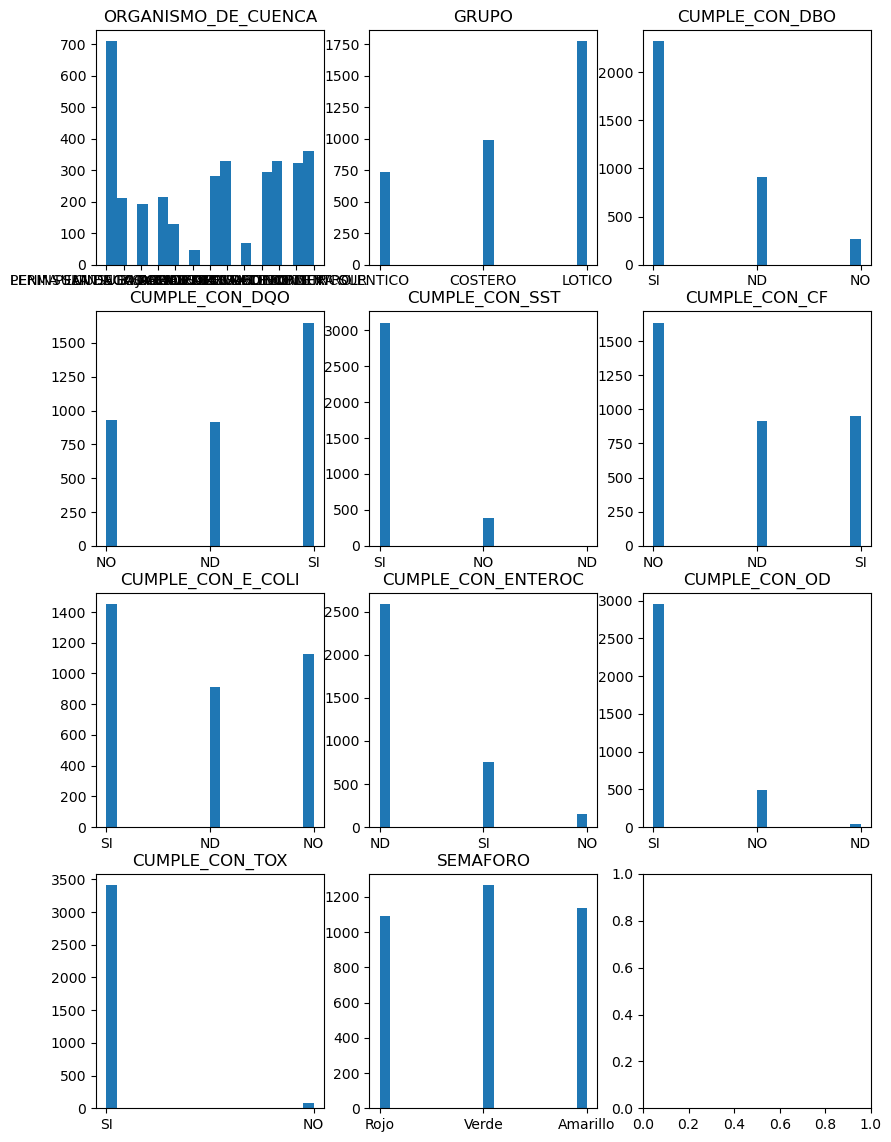

In [15]:
a = columns_o.tolist()
a.remove('CLAVE')
a.remove('SUBTIPO')

fig, axes = plt.subplots(4, 3, figsize =(10, 14))

for i in range(len(a)):
    plt.subplot(4,3,i+1)
    plt.hist(ndf[a[i]], 20)
    plt.title(a[i])

plt.show()

#### Análisis de variables de tipo float

In [16]:
columns_f = ndf.columns[np.array(ndf.dtypes.astype(str)=='float64')]
ndf[columns_f].describe()

,LONGITUD,LATITUD
count,3493.000000,3493.000000
mean,-100.359969,21.046992
std,6.122773,3.893696
min,-117.124030,14.534910
25%,-103.882310,18.396070
50%,-99.795530,20.148980
75%,-96.860230,22.828930
max,-86.732150,32.706500


In [17]:
g_df = ndf[['LONGITUD', 'LATITUD']]
g_df['Coordinates'] = list(zip(g_df['LONGITUD'], g_df['LATITUD']))
g_df['Coordinates'] = g_df['Coordinates'].apply(Point)

g_df = gpd.GeoDataFrame(g_df, geometry='Coordinates')

In [18]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

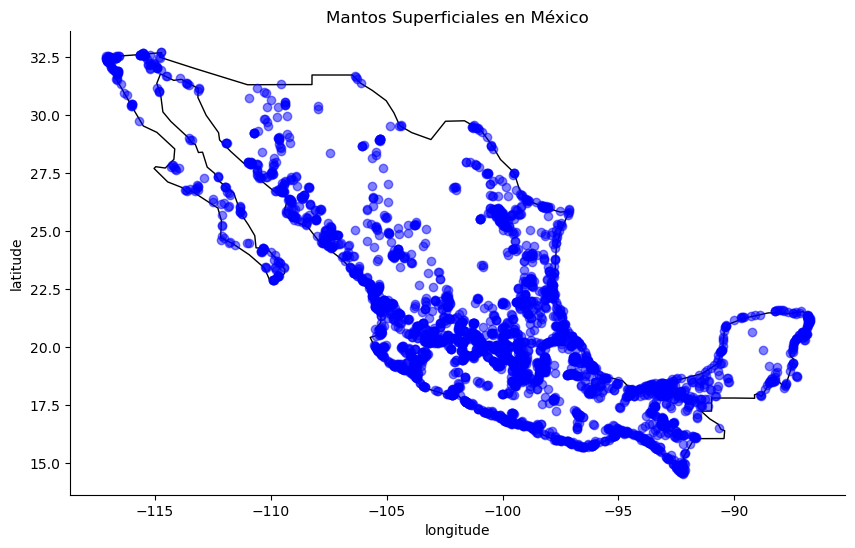

In [19]:
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

g_df.plot(ax=gax, color='blue', alpha = 0.5)


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Mantos Superficiales en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

#### K-means

In [20]:
g_df = ndf[['LONGITUD', 'LATITUD']]
g_df['Coordinates'] = list(zip(g_df['LONGITUD'], g_df['LATITUD']))
g_df['Coordinates'] = g_df['Coordinates'].apply(Point)

g_df = gpd.GeoDataFrame(g_df, geometry='Coordinates')
g_df_v = g_df[ndf['SEMAFORO']=='Verde']
g_df_a = g_df[ndf['SEMAFORO']=='Amarillo']
g_df_r = g_df[ndf['SEMAFORO']=='Rojo']

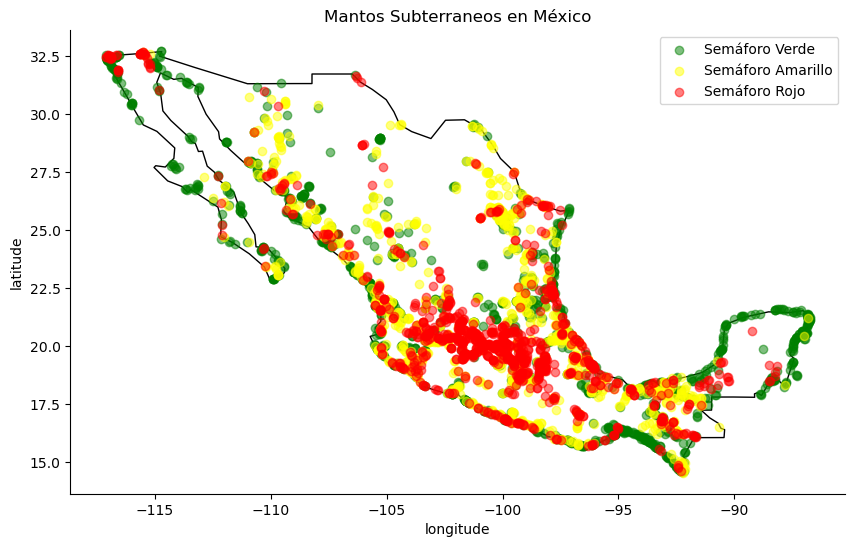

In [21]:
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

g_df_v.plot(ax=gax, color='green', alpha = 0.5, label='Semáforo Verde')
g_df_a.plot(ax=gax, color='yellow', alpha = 0.5, label='Semáforo Amarillo')
g_df_r.plot(ax=gax, color='red', alpha = 0.5, label='Semáforo Rojo')


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Mantos Subterraneos en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.legend()
plt.show()

In [22]:
km_scores= []
km_silhouette = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(ndf[['LATITUD', 'LONGITUD']])
    classification = kmeans.predict(ndf[['LATITUD', 'LONGITUD']])

    km_scores.append(-kmeans.score(ndf[['LATITUD', 'LONGITUD']]))
    
    silhouette = silhouette_score(ndf[['LATITUD', 'LONGITUD']], classification)
    km_silhouette.append(silhouette)

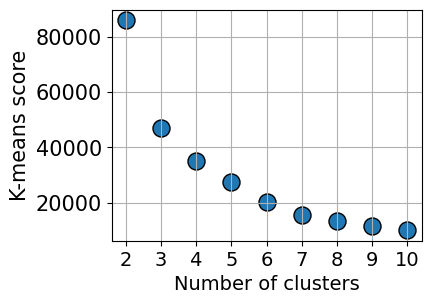

In [23]:
plt.figure(figsize=(4,3))
plt.scatter(x=[i for i in range(2,11)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,11)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

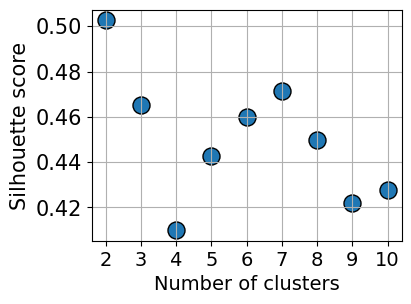

In [24]:
plt.figure(figsize=(4,3))
plt.scatter(x=[i for i in range(2,11)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,11)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [25]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(ndf[['LATITUD', 'LONGITUD']])

centers = kmeans.cluster_centers_
centers = pd.DataFrame(centers, columns=['LATITUD', 'LONGITUD'])
centers['Coordinates'] = list(zip(centers['LONGITUD'], centers['LATITUD']))
centers['Coordinates'] = centers['Coordinates'].apply(Point)

g_centers = gpd.GeoDataFrame(centers, geometry='Coordinates')

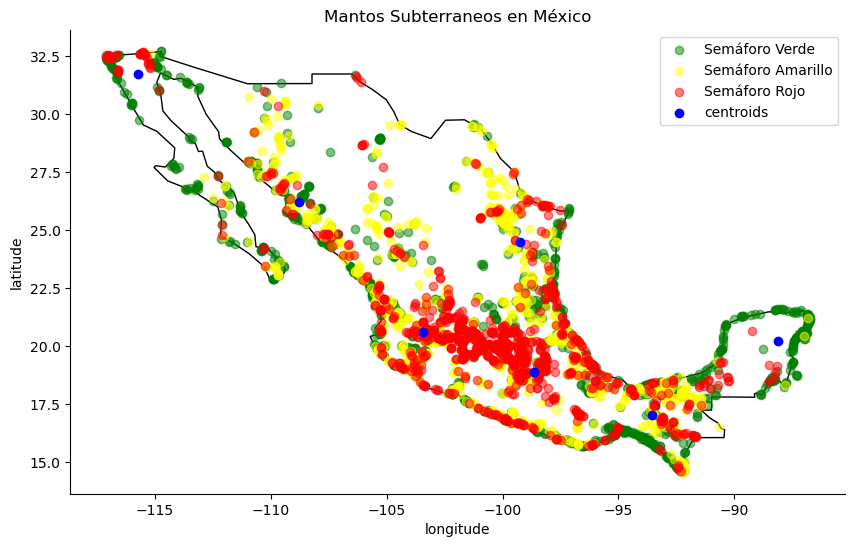

In [26]:
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

g_df_v.plot(ax=gax, color='green', alpha = 0.5, label='Semáforo Verde')
g_df_a.plot(ax=gax, color='yellow', alpha = 0.5, label='Semáforo Amarillo')
g_df_r.plot(ax=gax, color='red', alpha = 0.5, label='Semáforo Rojo')

g_centers.plot(ax=gax, color='blue', alpha = 1, label=str('centroids'))    

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Mantos Subterraneos en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.legend()
plt.show()

Para poder visualizar analizar de mejor manera la cantidad de puntos asignados a cada cluster, se raliza la siguiente gráfica cambiando la forma del punto.

In [27]:
clusters = kmeans.predict(ndf[['LATITUD', 'LONGITUD']])
ndf['clusters'] = clusters

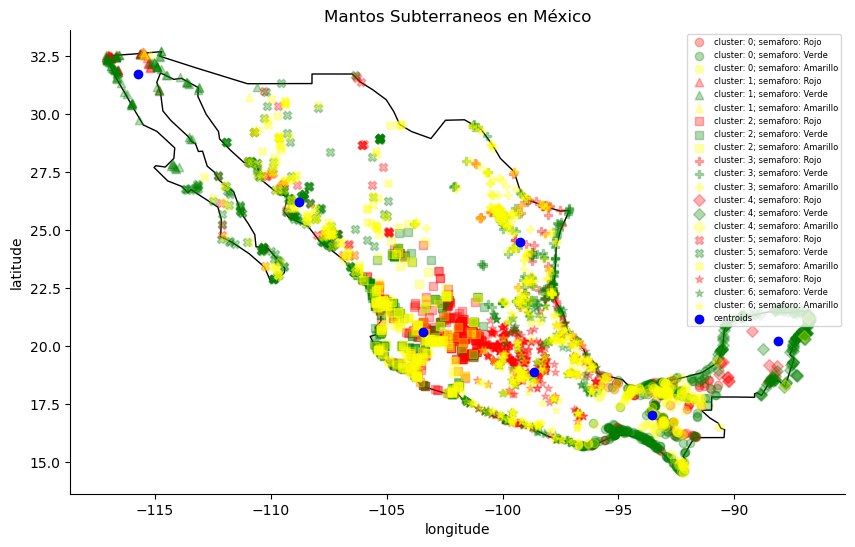

In [28]:
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

markers = ["o", "^", "s", "P", "D", "X", "*"]
semaforos = ['Verde', 'Amarillo', 'Rojo']
colors = ['green', 'yellow', 'red']

for cluster in range(len(ndf['clusters'].unique())):
    for semaforo in ndf['SEMAFORO'].unique():
        color = colors[semaforos.index(semaforo)]  
        marker = markers[cluster]
        label = 'cluster: ' + str(cluster) + '; semaforo: ' + semaforo
        g_df[(ndf['clusters']==cluster) & (ndf['SEMAFORO']==semaforo)].plot(ax=gax, color=color, marker=marker, alpha = 0.3, label=label)

g_centers.plot(ax=gax, color='blue', alpha = 1, label=str('centroids'))    

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Mantos Subterraneos en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.legend(loc=1, prop={'size': 6})
plt.show()

A continuación se incluye un análisis del total de elementos por cluster y por color.

In [29]:
Dic = {}

Dic['semaforo'] = ['Verde', 'Amarillo', 'Rojo', 'Total']

for cluster in range(len(ndf['clusters'].unique())):
    Dic['cluster ' + str(cluster)] = [ndf[(ndf['SEMAFORO']=='Verde') & (ndf['clusters']==cluster)].shape[0],
                    ndf[(ndf['SEMAFORO']=='Amarillo') & (ndf['clusters']==cluster)].shape[0],
                    ndf[(ndf['SEMAFORO']=='Rojo') & (ndf['clusters']==cluster)].shape[0],
                    ndf[ndf['clusters']==cluster].shape[0]                 ]


    
results = pd.DataFrame(Dic)
results = results.set_index('semaforo')
results.index.name = None
results

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6
Verde,276,87,205,134,148,212,205
Amarillo,188,5,275,189,4,148,326
Rojo,99,41,333,74,15,57,472
Total,563,133,813,397,167,417,1003


## Conclusiones - Parte 1

A partir del proceso de limpieza nos pudimos dar cuenta que la falta de datos a lo largo de toda la base de datos era recurrente, así como la duplicidad en los datos a tener la información de manera numérica y categórica al mismo tiempo. Se tomó la decisión de conservar solo las variables categóricas que resultaron de la evaluación de las condiciones.

El poder realizar gráficas y la tabla con las comparativas de los resultados de las clasificaciones se comprendió de mejor manera la colocación que le dio el K-means a cada uno de los puntos. En específico, se peude apreciar que el cluster 3 tiene mayoritariamente puntos verdes, lo cual se corrobora de manera visual en el mapa, donde la península de Yucatán muestra principalmente puntos de color verde.

Por otro lado, la zona del centro del país que correspondiente a los clusters 0 y 2, sí agrupa de una manera especial a los puntos con semáforo rojo, aunque tiene de igual forma presencia de puntos verdes y amarillos.

En conclusión, para poder clasificar de forma correcta los puntos en relación al semáforo que tiene cada uno, no es suficiente la ubicación geográfica, ya que aunque existen ciertas agrupaciones que tienen una tendencia hacia cierto tipo de color de semáforo, existen otros en cuyas clases estos se encuentran muy parejos.

De manera general, con la clasificació realizada a partir de kmeans, se puede concluir que de encontrar un cuerpo acuático superficial en algún lugar del país, es probable que sea más seguro tomar de este a medida que estamos lejos del centro del país.

## Instrucciones - Parte 2

En esta base de datos encontraras:
* Aguas subterráneas.
* Aguas superficiales.

Utilizando la base de datos que hayas elegido y hayas realizado su limpieza en la anterior entrega del reto, realiza lo siguiente:

* Selecciona tus variables independientes X y dependiente Y (semáforo)
* Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]
* Realiza un análisis general de las features importances a traves de decision trees o random forest.
* Selecciona las variables de mayor importancia.
* Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)
* Explora que clasificador es el más optimo, ejemplo:
 * Decision trees
 * Random Forest.
* Determina el grado de exactitud a través del reporte de clasificación https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
* Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.
* Realiza un reporte de los principales hallazgos y conclusiones del experimento e incluyelos en una presentación ejecutiva de 10 diapositivas. La presentación deberá incluir todos los pasos del pipeline seguidos, limpieza, análisis, kmeans, clasificación, resultados y conclusiones.

## Desarrollo - Parte 2

Se importan las librerías adicionales a utilizar:

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Se comenzará por realizar algunas transformaciones para las variables que son categóricas. Al no ser binarias, se utiliza un LabelEncoder. También se retira la columna CLAVE como variable y se deja como ID

In [31]:
ndf = ndf.set_index('CLAVE')
ndf

,ORGANISMO_DE_CUENCA,GRUPO,SUBTIPO,LONGITUD,LATITUD,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,SEMAFORO,clusters
CLAVE,,,,,,,,,,,,,,,
DLAGU8,LERMA SANTIAGO PACIFICO,LENTICO,PRESA,-102.33911,22.24730,SI,NO,SI,NO,SI,ND,SI,SI,Rojo,2
DLBAJ100,PENINSULA DE BAJA CALIFORNIA,COSTERO,OCEANO-MAR,-109.84290,22.90473,ND,ND,SI,ND,ND,SI,SI,SI,Verde,5
DLBAJ101,PENINSULA DE BAJA CALIFORNIA,COSTERO,OCEANO-MAR,-109.86442,22.89880,ND,ND,SI,ND,ND,SI,SI,SI,Verde,5
DLBAJ102,PENINSULA DE BAJA CALIFORNIA,COSTERO,BAHIA,-109.88604,22.89609,ND,ND,SI,ND,ND,SI,SI,SI,Verde,5
DLBAJ103,PENINSULA DE BAJA CALIFORNIA,COSTERO,BAHIA,-109.89657,22.87694,ND,ND,SI,ND,ND,SI,SI,SI,Verde,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OCRBR5206M1,RIO BRAVO,LOTICO,RIO,-99.42142,26.78971,SI,SI,SI,NO,NO,ND,SI,SI,Amarillo,3
OCRBR5207M1,RIO BRAVO,LENTICO,LAGO,-99.53064,27.43714,NO,NO,SI,NO,SI,ND,SI,SI,Rojo,3
OCRBR5208M1,RIO BRAVO,LOTICO,RIO,-99.50727,27.49901,SI,NO,SI,SI,SI,ND,SI,SI,Rojo,3


Para las variables de SUPTIPO se convierten todas a mayúsculas a fin de no generar ruido en el LabelEncoder.

In [32]:
ndf['SUBTIPO'] = ndf['SUBTIPO'].str.upper()

Se identifican las columnas de tipo objeto y de tipo flotante para poder realizar la transformación de label encoding.

In [33]:
ndf_o = ndf.columns[np.array(ndf.dtypes.astype(str)=='object')]
ndf_f = ndf.columns[np.array(ndf.dtypes.astype(str)=='float64')]

Se hace por medio de un ciclo for, ya que a través del column transformer no funcióno de manera correcta.

In [34]:
for column in ndf_o:
    le = preprocessing.LabelEncoder()
    le.fit(ndf[column])
    ndf[column] = le.transform(ndf[column])

In [35]:
ndf

,ORGANISMO_DE_CUENCA,GRUPO,SUBTIPO,LONGITUD,LATITUD,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,SEMAFORO,clusters
CLAVE,,,,,,,,,,,,,,,
DLAGU8,6,1,19,-102.33911,22.24730,2,1,2,1,2,0,2,1,1,2
DLBAJ100,10,0,18,-109.84290,22.90473,0,0,2,0,0,2,2,1,2,5
DLBAJ101,10,0,18,-109.86442,22.89880,0,0,2,0,0,2,2,1,2,5
DLBAJ102,10,0,1,-109.88604,22.89609,0,0,2,0,0,2,2,1,2,5
DLBAJ103,10,0,1,-109.89657,22.87694,0,0,2,0,0,2,2,1,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OCRBR5206M1,12,2,20,-99.42142,26.78971,2,2,2,1,1,0,2,1,0,3
OCRBR5207M1,12,1,12,-99.53064,27.43714,1,1,2,1,2,0,2,1,1,3
OCRBR5208M1,12,2,20,-99.50727,27.49901,2,1,2,2,2,0,2,1,1,3


Se hace mención que **0** es **AMARILLO**, **1** es **ROJO** y **2** es **VERDE**

Se separan las variables en X y Y

In [36]:
X = ndf.drop(columns = ['SEMAFORO', 'clusters'])
Y = ndf[['SEMAFORO']]

Se crea la siguiente función que nos va a permitir graficar la curva de aprendizaje

In [37]:
def mi_CurvePlot(train_sizes_param_range, train_scores, val_scores, title, xlabel, ylabel):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(7,6))
    plt.plot(train_sizes_param_range, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes_param_range, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes_param_range, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes_param_range, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

Se separan las X y Y en conjunto de entrenamiento y validación, con un 85% de los datos para entrenamiento.

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.85, random_state=1)

### Feature Importance

In [39]:
feature_names = X.columns
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, Y_train);

In [40]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

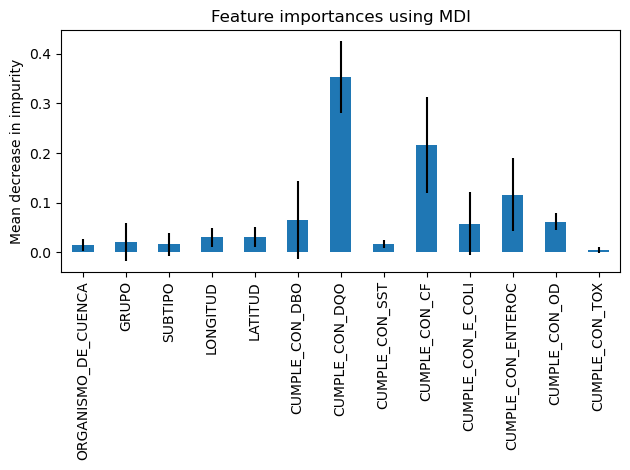

In [41]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Decision trees

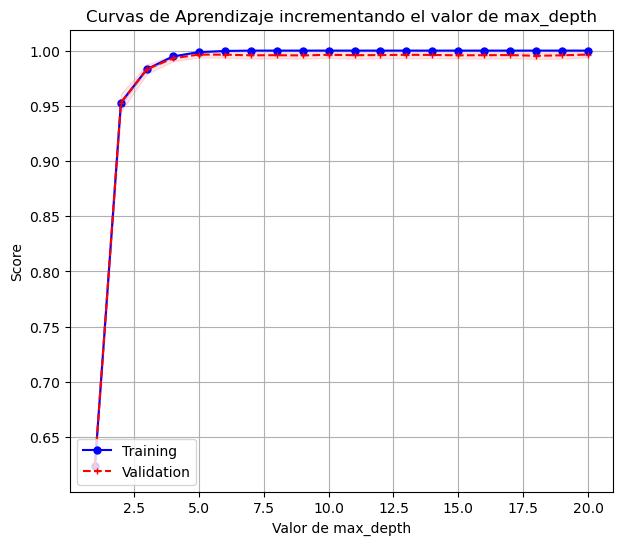

In [42]:
#Usa los parámetros predeterminados del modelo.
modelo = DecisionTreeClassifier()

#Genera un arreglo con los 20 valores de los tamaños de muestra
mi_param_range = np.linspace(1, 20, num=20)

#Aplica validación cruzada estratificada y con repeticiones
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

tr_scores, val_scores = validation_curve(estimator = modelo,
                                         X = X_train, y = Y_train,
                                         param_name = "max_depth",
                                         param_range = mi_param_range,
                                         cv = kfold,
                                         n_jobs=-1)

# Obtenemos el gráfico con las curvas de aprendizaje:
mi_CurvePlot(mi_param_range, tr_scores, val_scores, 
             title = 'Curvas de Aprendizaje incrementando el valor de max_depth', 
             xlabel = 'Valor de max_depth',
             ylabel= 'Score'     
            )

Se puede observar que a partir de una produndidad de 6, el sistema tiene un score de 1 de manera constante. Se realiza una evaluación sobre los datos de entrenamiento y se muestran resultados en una matriz de confusión.

In [43]:
modelo = DecisionTreeClassifier(max_depth=6)
modelo.fit(X_train, Y_train)
Y_hat = modelo.predict(X_train)

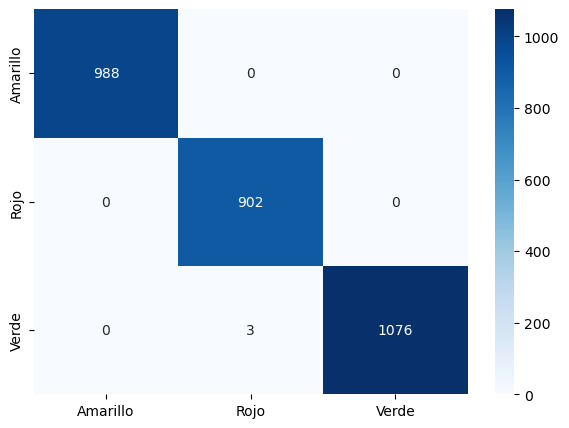

In [44]:
df_cm = confusion_matrix(Y_train, Y_hat)

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='.4g', xticklabels=['Amarillo', 'Rojo', 'Verde'], yticklabels=['Amarillo', 'Rojo', 'Verde'])
plt.show()

Se realiza lo mismo para los datos de validación.

In [45]:
Y_hat = modelo.predict(X_test)

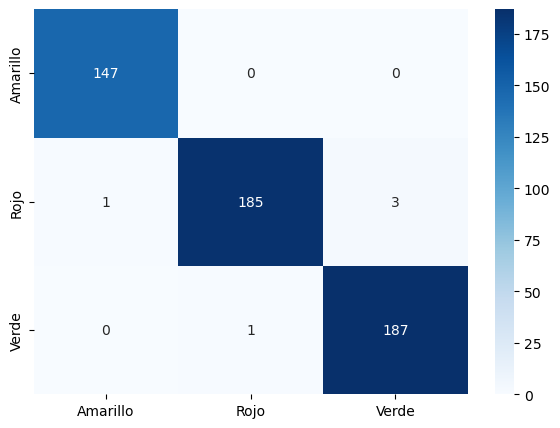

In [46]:
df_cm = confusion_matrix(Y_test, Y_hat)

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='.4g', xticklabels=['Amarillo', 'Rojo', 'Verde'], yticklabels=['Amarillo', 'Rojo', 'Verde'])
plt.show()

Por último se obtiene reporte de clasificación solicitado

In [47]:
target_names = ['Amarillo', 'Rojo', 'Verde']
print(classification_report(Y_test, Y_hat, target_names=target_names))

              precision    recall  f1-score   support

    Amarillo       0.99      1.00      1.00       147
        Rojo       0.99      0.98      0.99       189
       Verde       0.98      0.99      0.99       188

    accuracy                           0.99       524
   macro avg       0.99      0.99      0.99       524
weighted avg       0.99      0.99      0.99       524



### Random Forest

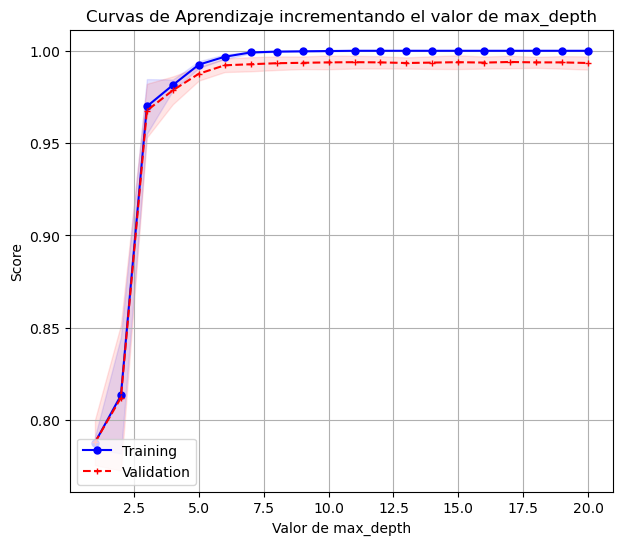

In [48]:
#Usa los parámetros predeterminados del modelo.
modelo = RandomForestClassifier()

#Genera un arreglo con los 20 valores de los tamaños de muestra
mi_param_range = np.linspace(1, 20, num=20)

#Aplica validación cruzada estratificada y con repeticiones
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

tr_scores, val_scores = validation_curve(estimator = modelo,
                                         X = X_train, y = Y_train,
                                         param_name = "max_depth",
                                         param_range = mi_param_range,
                                         cv = kfold,
                                         n_jobs=-1)

# Obtenemos el gráfico con las curvas de aprendizaje:
mi_CurvePlot(mi_param_range, tr_scores, val_scores, 
             title = 'Curvas de Aprendizaje incrementando el valor de max_depth', 
             xlabel = 'Valor de max_depth',
             ylabel= 'Score'     
            )

Se puede observar que a partir de una produndidad de 6, el sistema tiene un score de 1 de manera constante. Se realiza una evaluación sobre los datos de entrenamiento y se muestran resultados en una matriz de confusión.

In [49]:
modelo = RandomForestClassifier(max_depth=10)
modelo.fit(X_train, Y_train)
Y_hat = modelo.predict(X_train)

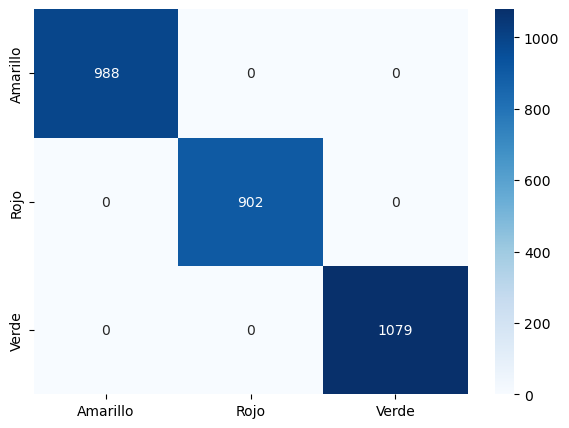

In [50]:
df_cm = confusion_matrix(Y_train, Y_hat)

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='.4g', xticklabels=['Amarillo', 'Rojo', 'Verde'], yticklabels=['Amarillo', 'Rojo', 'Verde'])
plt.show()

Se realiza lo mismo para los datos de validación.

In [51]:
Y_hat = modelo.predict(X_test)

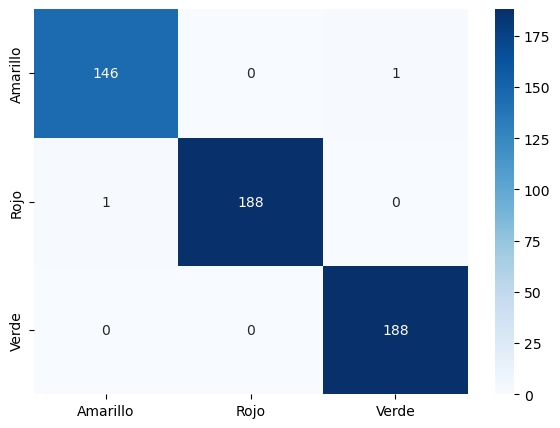

In [52]:
df_cm = confusion_matrix(Y_test, Y_hat)

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='.4g', xticklabels=['Amarillo', 'Rojo', 'Verde'], yticklabels=['Amarillo', 'Rojo', 'Verde'])
plt.show()

Por último se obtiene reporte de clasificación solicitado

In [53]:
target_names = ['Amarillo', 'Rojo', 'Verde']
print(classification_report(Y_test, Y_hat, target_names=target_names))

              precision    recall  f1-score   support

    Amarillo       0.99      0.99      0.99       147
        Rojo       1.00      0.99      1.00       189
       Verde       0.99      1.00      1.00       188

    accuracy                           1.00       524
   macro avg       1.00      1.00      1.00       524
weighted avg       1.00      1.00      1.00       524



## Conclusiones - Parte 2

Realizar un análisis del FeatureImportance con el bosque aleatorio nos hizo ver que si bien la columna nombrada como 'CUMPLE_CON_DQO' es la que tiene más importancia en el modelo, todas tienen hasta ciero punto un impacto para este. Era de esperarse que las variables ya categorizadas a partir de los valores numéricos fueran más importantes, pero se puede ver que hay algunas variables que inician con la etiqueta 'CUMPLE' que resultaron tener menor importancia que algunas otras como el GRUPO, SUBTIPO, CUENTA e incluso las coordenadas geográficas.

Por otro lado, se puede observar que para el Árbol de decisiones y el Bosque Aleatorio se obtiene muy buenos resultados en el conjunto de entrenamiento y que estos se manetiene en muy buenos valores para los conjuntos de prueba. Del reporte de clasificación se observa que para Precisión, Recall y F1-Score, el valor más bajo en todas las clases es de 0.98. Esto es muy bueno, porque quiere decir que no sólo calsifica de evitando falsos positivos, sino que también minimza los falsos negativos. De igual forma la métrica de Accuracy es de 0.99 en el caso más bajo, lo cual hace que la evaluación de los modelos haya resultado de manera satisfactoria.